In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy

In [2]:
# Set the ticks and label of figure

params = {'figure.autolayout': True,
         'legend.fontsize': 20,
          
         'axes.labelsize': 20,
         'axes.titlesize': 20,
         'axes.linewidth': 1.5,
          
         'axes.spines.left': True,
         'axes.spines.bottom': True,
          
         'xtick.labelsize': 20,
         'ytick.labelsize': 20, 
         'xtick.major.size': 3.5,
         'ytick.major.size': 3.5,
         'xtick.major.width': 1.2,
         'ytick.major.width': 1.2}
pylab.rcParams.update(params)

In [3]:
folder = '/Users/daron/Desktop/Sorting_test'
fn = 'Z-f_index.mat'

In [4]:
# Set the directory
datafile = folder+'/'+fn

In [5]:
datafile

'/Users/daron/Desktop/Sorting_test/Z-f_index.mat'

In [6]:
# Load the .mat file and store as a dictionary
index_data = scipy.io.loadmat(datafile)

In [7]:
# Get a list of the keys in the dictionary
index_keys = index_data.keys()
print(index_keys)

dict_keys(['__header__', '__version__', '__globals__', 'burst_index', 'asymatry_value', 'T_P_latency', 'data', 'f_index', 'half_duration'])


In [14]:
np.arange(1)

array([0])

In [15]:
np.random.choice(2,10)

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1])

In [42]:
print(Samplespace[0:4])

[1 0 0 1]


## Sampling

In [50]:
import time

In [59]:
Samplespace = np.random.choice(2,int(1e4))
for i,s in enumerate(Samplespace):
    time.sleep(.0005)
    if i<=10:
        print(Samplespace[0:i],end='\r')
    elif i>10:
        print(Samplespace[i-10:i],end='\r')
    else:
        print('Error')
[print('\rYNMT',end=' '*20) if np.mean(Samplespace)>=.5 else print('\rBBS',end=' '*20)]

YNMT                    

[None]

In [57]:
1862+510

2372

In [11]:
# Get a list of the key-value pairs in the dictionary
# items = mat_data.items()
# print(items)

In [12]:
# Import the data
cell_name = [cn[0] for cn in index_data['f_index'][0][0][0][:, 0]]
T_to_P = [tp[0] for tp in index_data['T_P_latency']]
half_duration = [hd[0] for hd in index_data['half_duration']]
Burst_I = [bi[0] for bi in index_data['burst_index']]
asymmetry_value = [asv[0] for asv in index_data['asymatry_value'].T]

In [13]:
unit_name = ['ch'+cn.split('-')[1][-2:]+f'_unit{i+1}' for i,cn in enumerate(cell_name)]

In [14]:
# Define the data as a numpy array for clustering
X = np.array([[tp,hd,ai] for tp,hd,ai in zip(T_to_P,half_duration,asymmetry_value)])

In [15]:
cell_name

['Z-ch001-unit02',
 'Z-ch001-unit03',
 'Z-ch001-unit04',
 'Z-ch002-unit05',
 'Z-ch003-unit06',
 'Z-ch004-unit07',
 'Z-ch005-unit02',
 'Z-ch006-unit03',
 'Z-ch007-unit04',
 'Z-ch008-unit05',
 'Z-ch009-unit02',
 'Z-ch010-unit03',
 'Z-ch012-unit04',
 'Z-ch013-unit02',
 'Z-ch013-unit04',
 'Z-ch014-unit03',
 'Z-ch016-unit05']

In [51]:
neuronfile = folder+'/'+cell_name[0]+'.mat'
# Load the .mat file and store as a dictionary
unit_data = scipy.io.loadmat(neuronfile)
# Get a list of the keys in the dictionary
ind_keys = unit_data.keys()
print(ind_keys)

dict_keys(['__header__', '__version__', '__globals__', 'sffile'])


In [52]:
unit_data['sffile']

array([[(array([[   6.00503333],
               [  14.51296667],
               [  15.79413333],
               ...,
               [1285.93813333],
               [1291.04456667],
               [1311.40406667]]), array([[-1.06795615e+01, -1.08384104e+01, -1.17508403e+01,
                -1.31950987e+01, -1.40054723e+01, -1.30816682e+01,
                -1.05907194e+01, -8.07676676e+00, -7.05888136e+00,
                -7.27370352e+00, -6.44356783e+00, -2.26539410e+00,
                 4.99253367e+00,  1.20502288e+01,  1.54539902e+01,
                 1.54188318e+01,  1.65807303e+01,  2.38497386e+01,
                 3.65919676e+01,  4.72957296e+01,  4.77523374e+01,
                 3.82535458e+01,  3.03984798e+01,  3.79981315e+01,
                 6.16379120e+01,  8.09611699e+01,  6.51372798e+01,
                -3.00899250e+00, -1.07718302e+02, -2.03667326e+02,
                -2.42778244e+02, -2.05612828e+02, -1.13598625e+02,
                -1.31586551e+01,  5.51611265e+01,  7.900

In [9]:
# Read the waveform data from the cell name
def read_waveform(unit_filename):
    neuronfile = folder+'/'+unit_filename+'.mat'
    # Load the .mat file and store as a dictionary
    unit_data = scipy.io.loadmat(neuronfile)
    
    return unit_data['sffile']['mean_ana_wave'][0][0]

In [260]:
# Plot the waveforms for an unit in 4 channels by the cell name
def plot_4_waveform(unit_filename):
    fig, axs = plt.subplots(nrows=4,ncols=1,sharey=True)
    fig.set_size_inches(3,3)
    rep_ch,amp = 5,0
    for i,wf in enumerate(read_waveform(unit_filename)):
        if np.min(wf)<amp:
            rep_ch,amp = i,np.min(wf)
        else:
            next
        axs[i].plot(wf,alpha=.5)
        axs[i].set_ylabel(f'ch{i+1}')
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        axs[i].set_frame_on(False)
    # Plot the representtative waveform    
    axs[rep_ch].plot(read_waveform(unit_filename)[rep_ch],
                     c='red',alpha=.5)
    axs[0].set_title(f'{unit_filename}') 
    
    J_rep_ch = int(float(unit_filename.split('-')[1][-2:])%4)-1
    if rep_ch==J_rep_ch:
        print(f'D_rep_ch={rep_ch},J_rep_ch={J_rep_ch}')
    else:
        print(f'Error in {unit_filename}; D_rep_ch={rep_ch},J_rep_ch={J_rep_ch}')
    
    return rep_ch

D_rep_ch=0,J_rep_ch=0


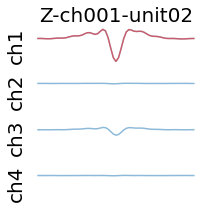

In [258]:
ch_i = plot_4_waveform(cell_name[0])

## Calculate the 'Asymmetry index'

In [91]:
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

In [201]:
aInd_func = lambda a,b: (b-a)/(b+a)

In [208]:
# Train the interpolation function
def asymmetryInd(cell_name,fold=5):
    raw_wf = read_waveform(cell_name)[plot_4_waveform(cell_name)]
    # Interpolate the data points to the fold u pass
    itp_func = interp1d(raw_x:=np.linspace(0,2,len(raw_wf)),raw_wf,
                        kind='cubic')
    itp_wf = itp_func(itp_x:=np.linspace(0,2,len(raw_wf)*fold))
    peaks_itp, _ = find_peaks(itp_wf,prominence=5, width=3*fold)
    aInd = np.diff(itp_wf[peaks_itp])/np.sum(itp_wf[peaks_itp])
    return aInd

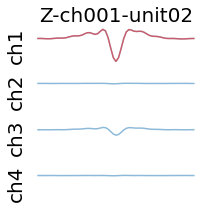

In [209]:
aInd = asymmetryInd(cell_name[0],fold=5)

D_rep_ch=0,J_rep_ch=0
D_rep_ch=0,J_rep_ch=0
D_rep_ch=0,J_rep_ch=0
D_rep_ch=1,J_rep_ch=1
D_rep_ch=2,J_rep_ch=2
Error in Z-ch004-unit07; D_rep_ch=3,J_rep_ch=-1
D_rep_ch=0,J_rep_ch=0
D_rep_ch=1,J_rep_ch=1
D_rep_ch=2,J_rep_ch=2
Error in Z-ch008-unit05; D_rep_ch=3,J_rep_ch=-1
D_rep_ch=0,J_rep_ch=0
D_rep_ch=1,J_rep_ch=1
Error in Z-ch012-unit04; D_rep_ch=3,J_rep_ch=-1
D_rep_ch=0,J_rep_ch=0
Error in Z-ch013-unit04; D_rep_ch=2,J_rep_ch=0
D_rep_ch=1,J_rep_ch=1
Error in Z-ch016-unit05; D_rep_ch=3,J_rep_ch=-1


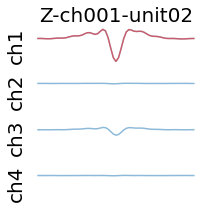

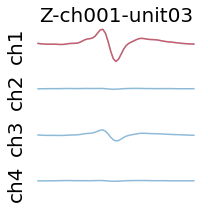

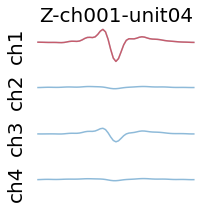

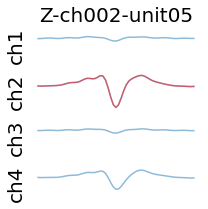

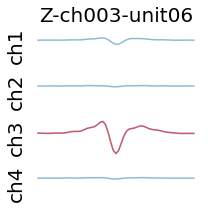

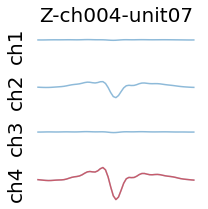

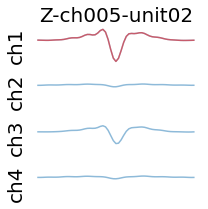

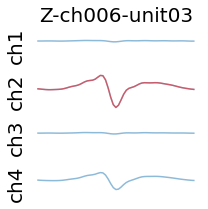

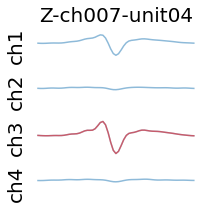

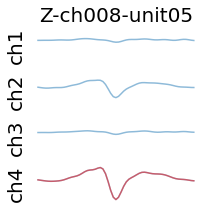

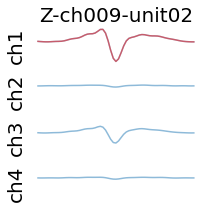

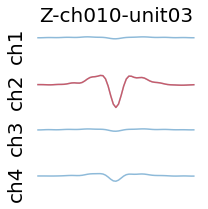

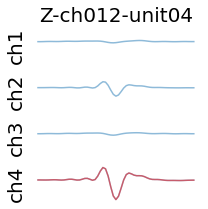

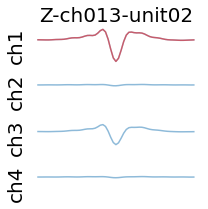

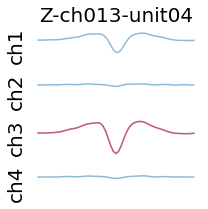

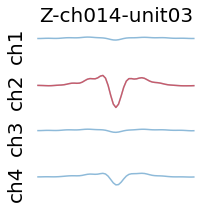

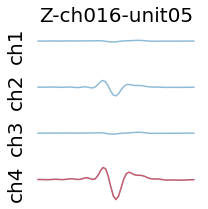

In [261]:
aInd_list = [asymmetryInd(c,fold=5)[0] for c in cell_name]

In [214]:
aInd_list,asymmetry_value

[-0.011541997996816359,
 -0.5210281485360704,
 -0.45709960200164634,
 0.004764972577026041,
 -0.26951042442312506,
 -0.3878311305972428,
 -0.21278851495763204,
 -0.46922966161987095,
 -0.5248938218581014,
 -0.28237308904015707,
 -0.35121975876509975,
 -0.03959090099598565,
 -0.3025108676140124,
 -0.1598873280988943,
 0.07331406396937996,
 -0.15487782883252005,
 -0.25838944750237774]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

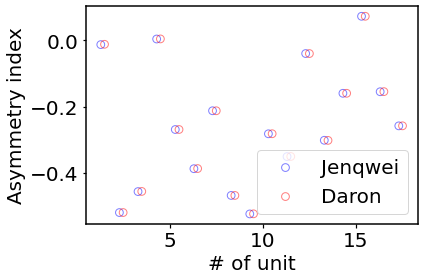

In [238]:
plt.scatter(np.arange(1,len(asymmetry_value)+1,1)+.3,asymmetry_value,
            s=60,facecolors='none',edgecolors='blue',alpha=.5,label='Jenqwei')
plt.scatter(np.arange(1,len(aInd_list)+1,1)+.5,aInd_list,
            s=60,facecolors='none',edgecolors='red',alpha=.5,label='Daron')
plt.xlabel('# of unit')
plt.ylabel('Asymmetry index')
plt.legend(loc='lower right')

(-0.5, 0.5)

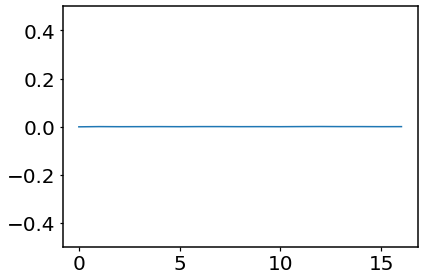

In [244]:
plt.plot([a-b for a,b in zip(asymmetry_value, aInd_list)])
plt.ylim([-.5,.5])

In [46]:
# Plot the representative waveform by the cell name
def represent_waveform(unit_filename):
    return read_waveform(unit_filename)[int(float(unit_filename.split('-')[1][-2:])%4)-1]

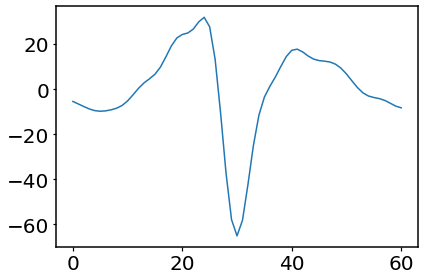

In [47]:
plt.plot(represent_waveform(cell_name[9]))

In [91]:
def tunefig(xlabel,ylabel):
#     plt.xlim(xlim)
#     plt.ylim(ylim)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
#     plt.title(title)

    ax = plt.gca()
    # Hide the spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Move spines outward by 10 points
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

In [183]:
X[:,1],half_duration

(array([0.07666667, 0.135     , 0.09666667, 0.09666667, 0.095     ,
        0.09833333, 0.08666667, 0.12166667, 0.115     , 0.11833333,
        0.10333333, 0.08      , 0.085     , 0.08333333, 0.10333333,
        0.08333333, 0.08333333]),
 [0.07666666666666667,
  0.135,
  0.09666666666666666,
  0.09666666666666666,
  0.095,
  0.09833333333333333,
  0.08666666666666667,
  0.12166666666666666,
  0.115,
  0.11833333333333333,
  0.10333333333333333,
  0.08,
  0.085,
  0.08333333333333333,
  0.10333333333333333,
  0.08333333333333333,
  0.08333333333333333])

## K-means

In [271]:
# Define the number of clusters
n_clusters = 2

# Initialize the KMeans model
kmeans = KMeans(n_clusters=n_clusters)

# Fit the model to the data
kmeans.fit(X)

# Predict the clusters for each data point
kmeans_clusters = kmeans.predict(X)

# Print the cluster labels for each data point
print(clusters)


[1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1]


## Hierarchy

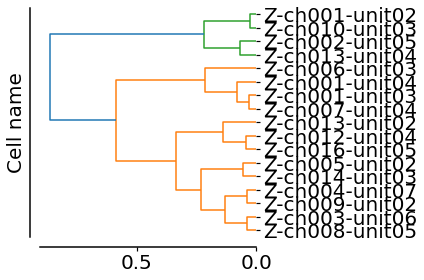

In [296]:
# Compute the hierarchy
Z = hierarchy.linkage(X, 'ward')
# Define the number of cluster
n_cluster = 2
hier_clusters = hierarchy.fcluster(Z,n_cluster,criterion='maxclust')

# Create a figure and an axes object
fig, ax = plt.subplots()

# Plot the dendrogram
hierarchy.dendrogram(Z,labels=cell_name,orientation='left',count_sort='descending')
tunefig(xlabel=None,
        ylabel='Cell name',
       )
# Show the plot
plt.show()


In [343]:
len(cell_name)

17

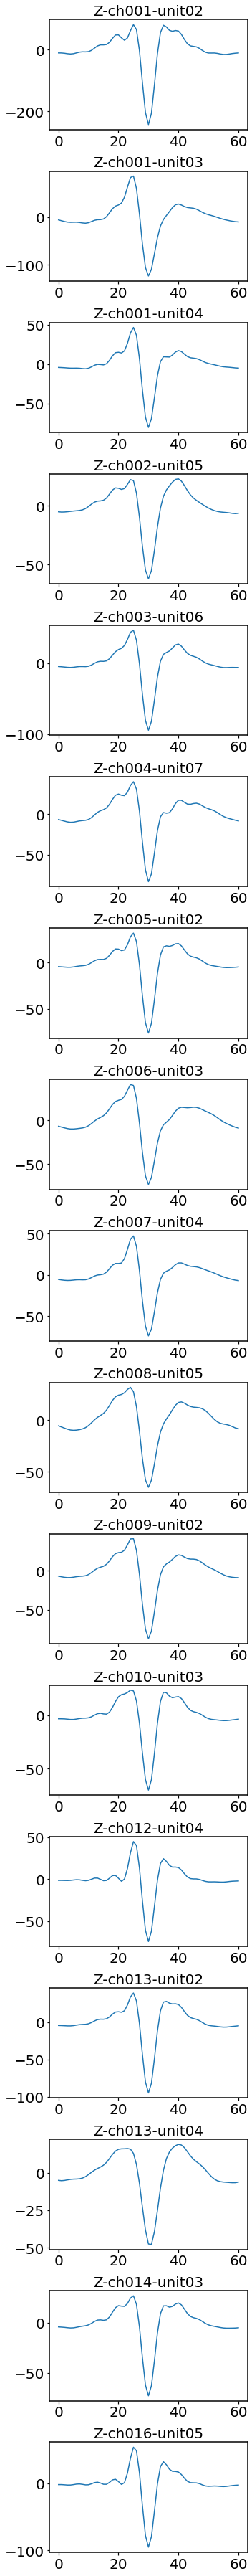

In [48]:
fig, axs = plt.subplots(nrows=len(cell_name),ncols=1)
fig.set_size_inches(5,50)
for i,cn in enumerate(cell_name):
    axs[i].plot(represent_waveform(cn))
    axs[i].set_title(cn)

In [297]:
represent_list = [cell_name[i] for i in np.where(hier_clusters==1)[0]]

In [298]:
represent_list

['Z-ch001-unit02', 'Z-ch002-unit05', 'Z-ch010-unit03', 'Z-ch013-unit04']

In [336]:
plot_mean_waveform(represent_list)

IndexError: list index out of range

[None, None, None, None]

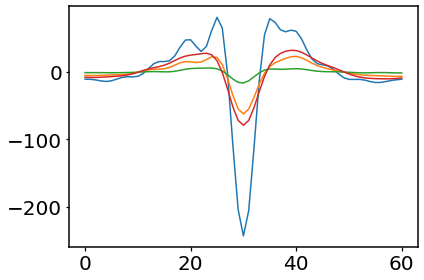

In [287]:
[plot_mean_waveform(cn) for cn in represent_list]

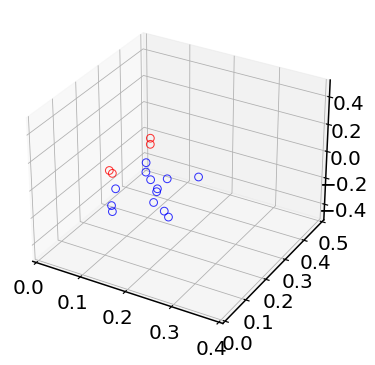

In [173]:
x = half_duration
y = T_to_P
z = asymmetry_value
colors = ['red','blue']
# Create a figure and an Axes3D object
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

# Plot the data as a scatter plot
for i in range(len(x)):
    ax.scatter(x[i], y[i], z[i],
               s=60,facecolors='none',edgecolors=colors[hier_clusters[i]-1],alpha=.8)


# plt.plot([0,.5],[0,0], [0,0],'k--',linewidth=1,alpha=.9)
# # plt.plot([.2,.2],[-1,1],'k--',linewidth=1,alpha=.9)
# # plt.yscale('log')
# plt.xticks([0,0.1,0.2,0.3,0.4],[0,0.1,0.2,0.3,0.4])
# plt.yticks([-1,-0.5,0,0.5,1],[-1,-0.5,0,0.5,1])

ax.set_xlim([0,.4])
ax.set_ylim([0,.5])
ax.set_zlim([-.5,.5])
# Show the plot
plt.show()


In [89]:
# Assign the unit into different groups

for i,(dt,BI,fr) in enumerate(zip(dt_list,BI_list,fr_list)):
    if dt<0.425:
        plt.scatter(dt,BI,s=50,facecolors='none',edgecolors='blue',
                    alpha=.8,label=f'Unit{i+1}:{fr}Hz')
    elif dt>=0.425:
        plt.scatter(dt,BI,s=50,facecolors='none',edgecolors='red',
                    alpha=.8,label=f'Unit{i+1}:{fr}Hz')
    else: print('Error')

/var/folders/tk/yk6wh18j3yj1098rnmzhsc300000gn/T/ipykernel_69844/1185582465.py:18: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([0,1e2])


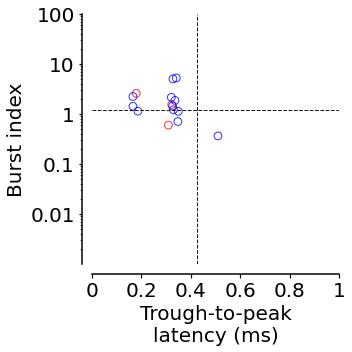

In [169]:
x = T_to_P
y = Burst_I

plt.figure(figsize=(5,5))
for i in range(len(x)):
    plt.scatter(x[i], y[i],
               s=60,facecolors='none',edgecolors=colors[hier_clusters[i]-1],alpha=.8)

tunefig(xlabel='Trough-to-peak\nlatency (ms)',
        ylabel='Burst index',
       )

plt.plot([0,1],[1.2,1.2],'k--',linewidth=1,alpha=.9)
plt.plot([.425,.425],[1e-3,1e2],'k--',linewidth=1,alpha=.9)
plt.yscale('log')
plt.xticks([0,0.2,0.4,0.6,0.8,1],[0,0.2,0.4,0.6,0.8,1])
plt.yticks([0,0.01,0.1,1,10,100],[0,0.01,0.1,1,10,100])
plt.ylim([0,1e2])
plt.xlim([0,1.0])

[plt.savefig(f'{folder}/python_figures/TP_vs_BI.{ff}',dpi=500,
             transparent=True,bbox_inches='tight') for ff in ['svg','png']]
plt.show()

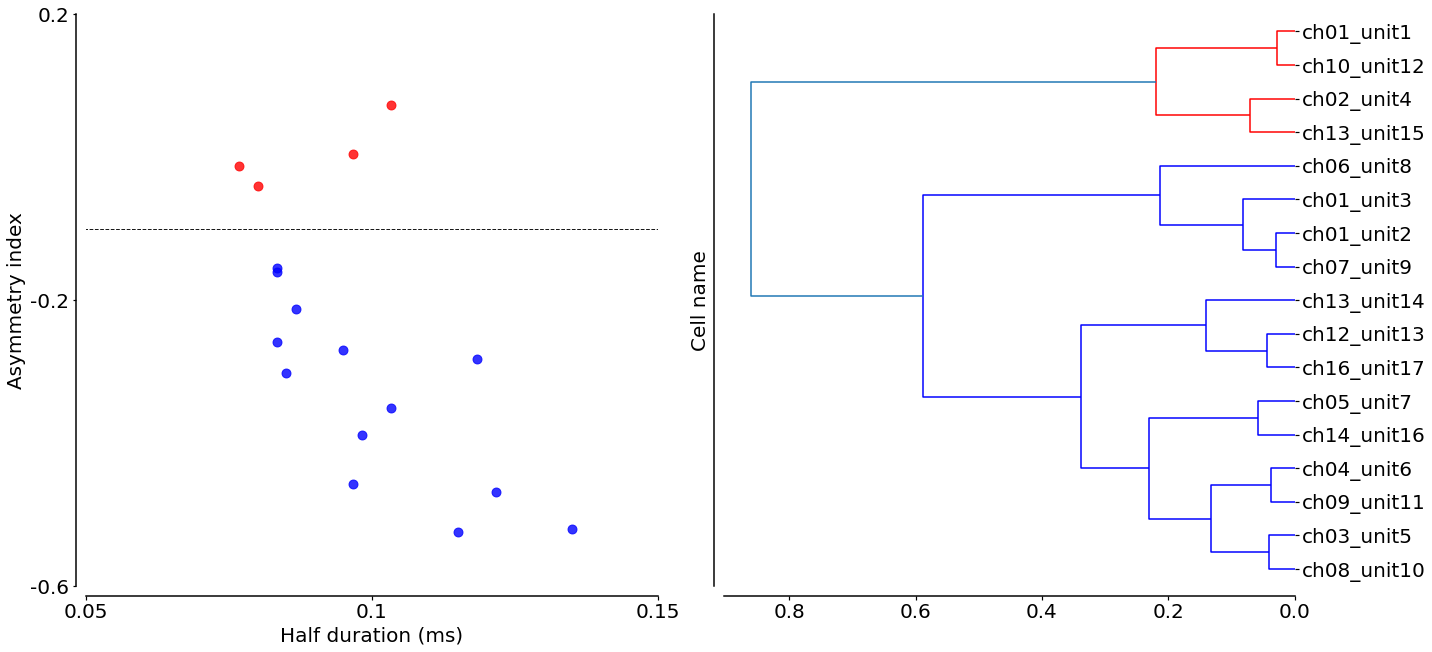

In [362]:
x = half_duration
y = asymmetry_value
plt.figure(figsize=(20,10))
# plot the half duration V.S. Asymmetry index ------------------------------------------
plt.subplot(121)
for i in range(len(x)):
    plt.scatter(x[i], y[i],
               s=80,facecolors=colors[hier_clusters[i]-1],
                edgecolors=colors[hier_clusters[i]-1],alpha=.8)
tunefig(xlabel='Half duration (ms)',
        ylabel='Asymmetry index',
       )
plt.gca().set_box_aspect(1)
plt.plot([0,.2],[-.1,-.1],'k--',linewidth=1,alpha=.9)
# plt.plot([.2,.2],[-1,1],'k--',linewidth=1,alpha=.9)
# plt.yscale('log')
plt.xticks([.05,.1,0.15],[.05,.1,0.15])
plt.yticks([-.6,-.2,.2],[-.6,-.2,.2])

plt.xlim([0.05,.15])
plt.ylim([-.6,.2])

# plot the dendrogram ------------------------------------------
plt.subplot(122)
# Plot the dendrogram
hierarchy.dendrogram(Z,
                     color_threshold=.7,
                     labels=unit_name,orientation='left',count_sort='descending')
hierarchy.set_link_color_palette(['blue','red'])
tunefig(xlabel=None,
        ylabel='Cell name',
       )
plt.gca().set_box_aspect(1)
# plt.gca().set_xticklabels(labels=cell_name, rotation=45, ha='right')
[plt.savefig(f'{folder}/python_figures/HD_vs_AI.{ff}',dpi=500,
             transparent=True,bbox_inches='tight') for ff in ['svg','png']]
plt.show()

In [79]:
14/33

0.42424242424242425

In [90]:
print(f'Save {326678-148114}(NTD), {round((326678-148114)/326678*100,1)}% off ')

Save 178564(NTD), 54.7% off 


In [89]:
178564/28000

6.377285714285715